## Exploratory Data Analysis of Well Logs

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#importing data
data = pd.read_csv("xeek_train_subset.csv")

In [3]:
#viewing data
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


In [4]:
#exploring data
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [5]:
#viewing data satistics 
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,...,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640835,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,...,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,...,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843750,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,...,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781250,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,...,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000
50%,1747.524495,444152.093750,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,...,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093750,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,...,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156250,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,...,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000,99000.000000,3.000000


In [6]:
data.shape

(133198, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              125805 non-null  float64
 3   Y_LOC                              125805 non-null  float64
 4   Z_LOC                              125805 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133006 non-null  float64
 8   RSHA                               62039 non-null   float64
 9   RMED                               125556 non-null  float64
 10  RDEP                               125805 non-null  float64
 11  RHOB                               1080

In [8]:
#identifying different wells
data["WELL"].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

In [9]:
#identifying number of different wells
data["WELL"].nunique()

12

<AxesSubplot:>

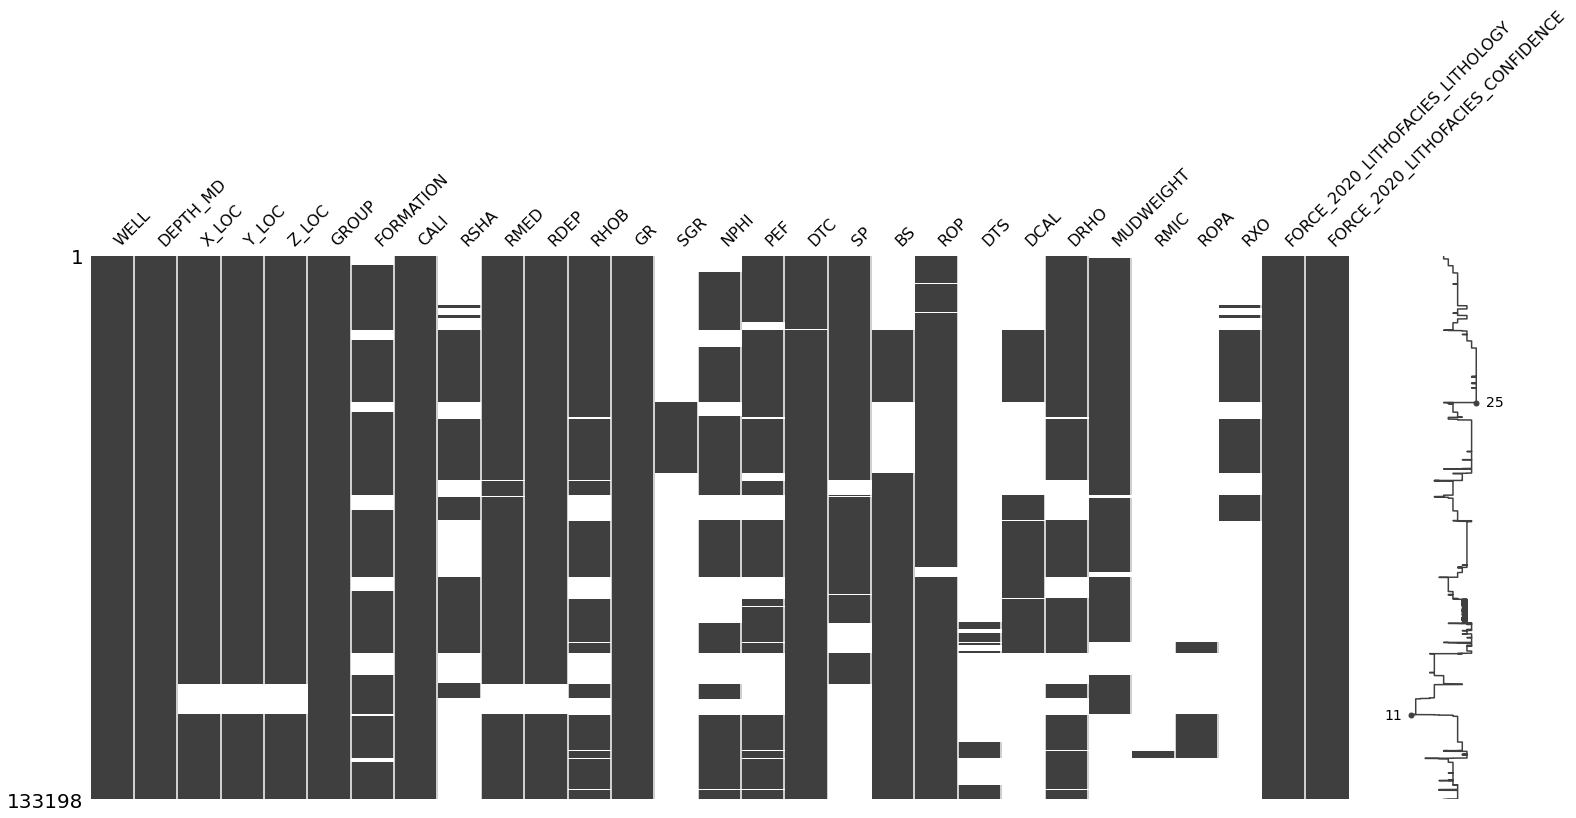

In [10]:
#identifying missdata using missingno lib
msno.matrix(data)

<AxesSubplot:>

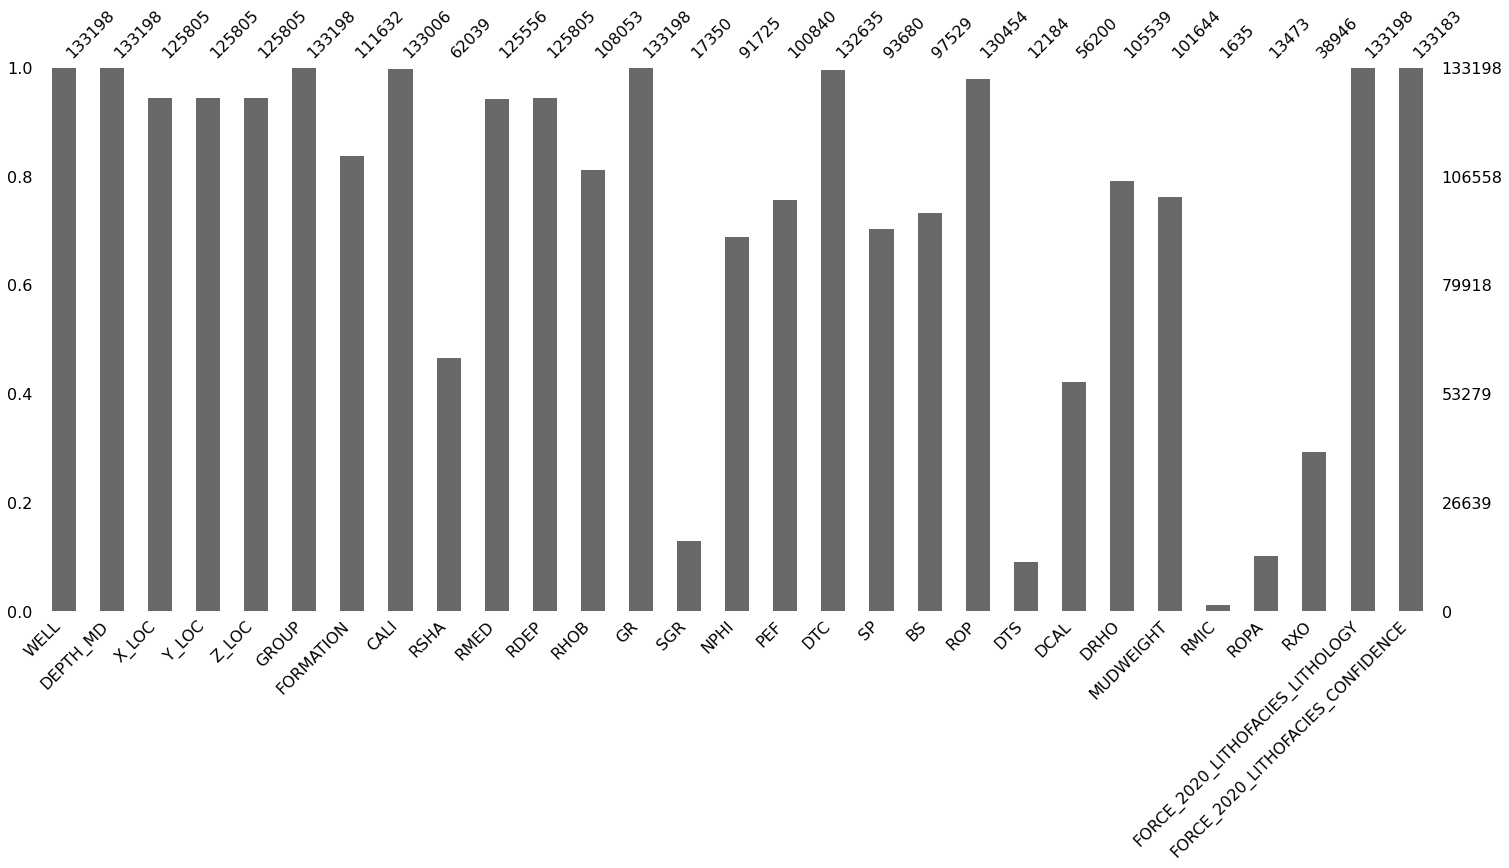

In [11]:
#missing data in terms of bar
msno.bar(data)

### Missing data visualisation

In [12]:
#Missing data visualization (taking common logs)
data_nan = data[["WELL", "DEPTH_MD", "CALI", "RHOB", "GR", "NPHI", "BS", "PEF", "DTS", "RDEP", "RMED", "DTC"]].copy()

In [13]:
# enumerating requring columns & grouping by data by wells(for further analysis)
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace = True)
    print(col, num)
grouped = data_nan.groupby("WELL")

CALI 0
RHOB 1
GR 2
NPHI 3
BS 4
PEF 5
DTS 6
RDEP 7
RMED 8
DTC 9


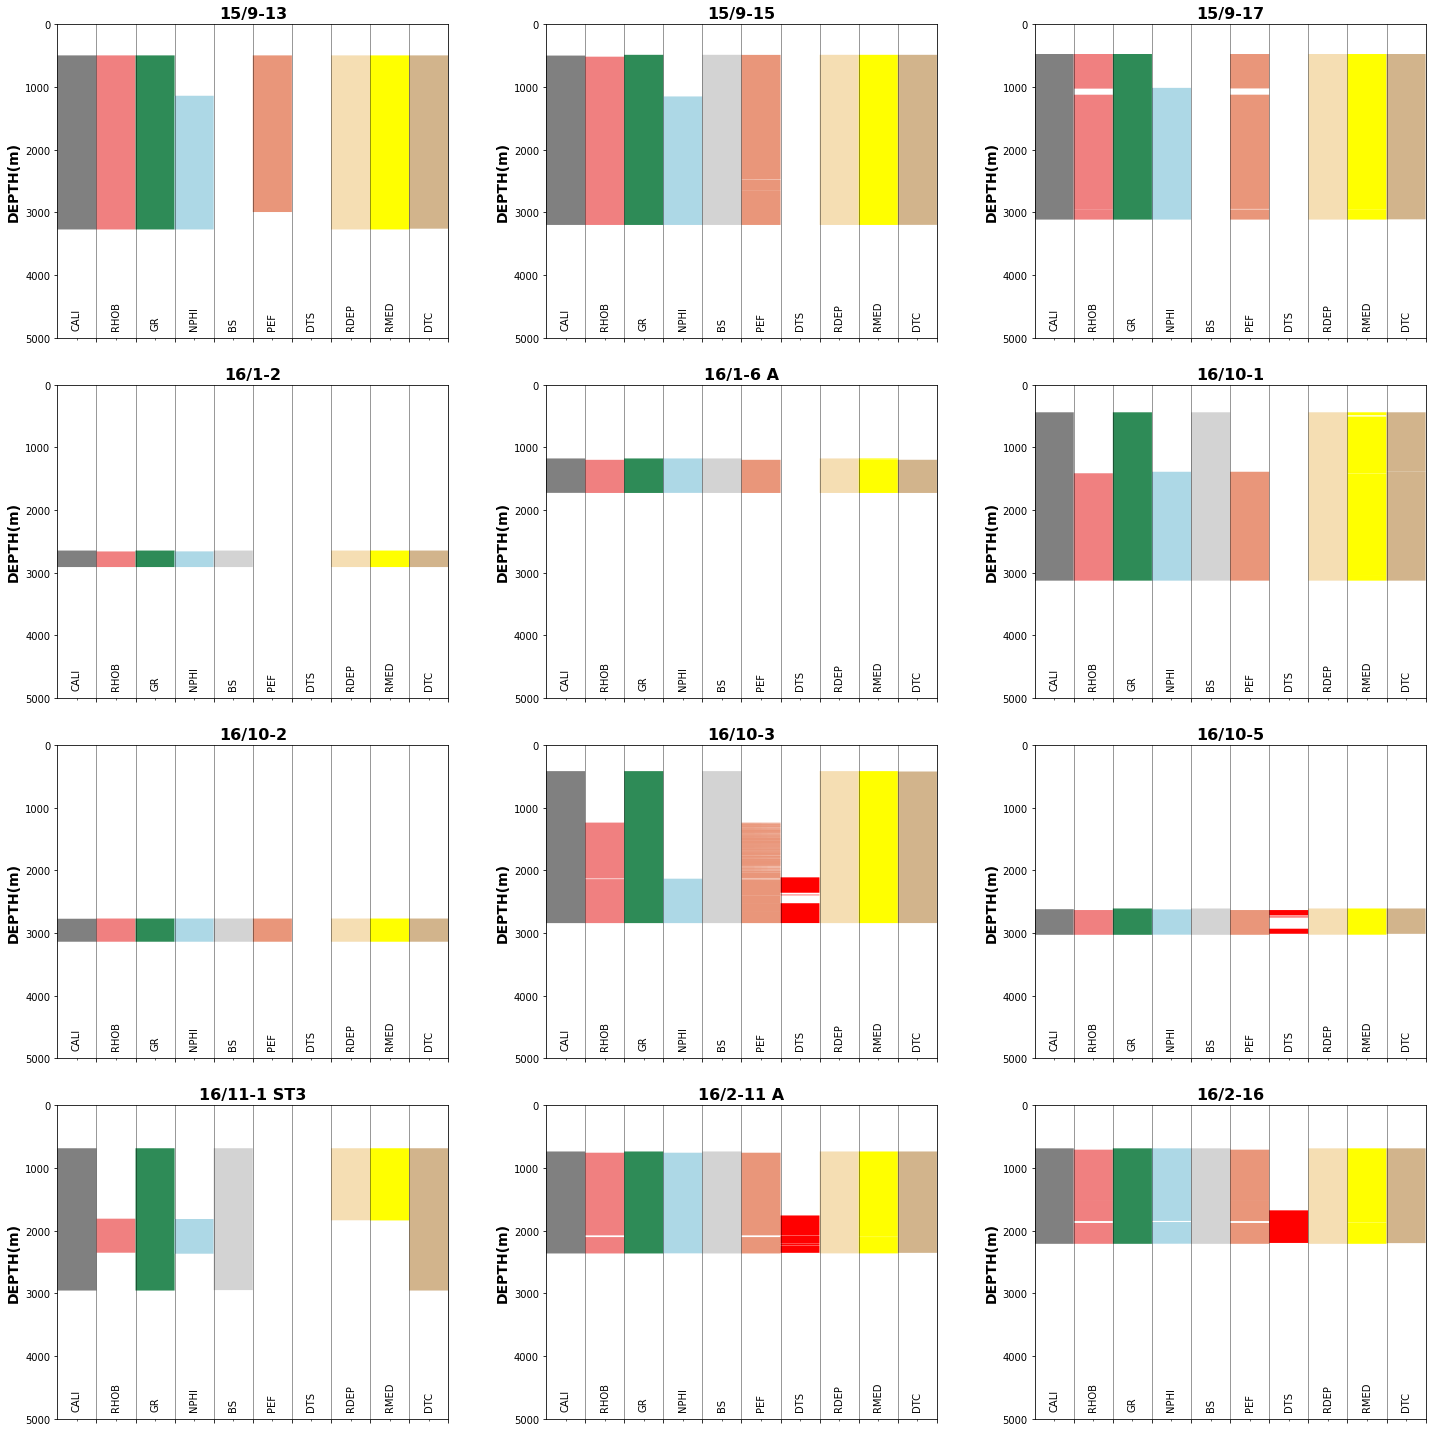

In [14]:
#set up the labels we want to display on the x-axis

labels = ["CALI", "RHOB", "GR", "NPHI", "BS", "PEF", "DTS", "RDEP", "RMED", "DTC"]

#setup the figure and the subplots

fig, axs = plt.subplots(4, 3, figsize = (20, 20))
#loop through each well in grouped df
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_ylim(5000, 0)
    ax.set_xlim(0, 9)
    #creating multiple fill between for each curve 
    #it will represent null values 
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor = "grey")
    ax.fill_betweenx(df.DEPTH_MD, 1, df.RHOB, facecolor = "lightcoral")
    ax.fill_betweenx(df.DEPTH_MD, 2, df.GR, facecolor = "seagreen")
    ax.fill_betweenx(df.DEPTH_MD, 3, df.NPHI, facecolor = "lightblue")
    ax.fill_betweenx(df.DEPTH_MD, 4, df.BS, facecolor = "lightgrey")
    ax.fill_betweenx(df.DEPTH_MD, 5, df.PEF, facecolor = "darksalmon")
    ax.fill_betweenx(df.DEPTH_MD, 6, df.DTS, facecolor = "red")
    ax.fill_betweenx(df.DEPTH_MD, 7, df.RDEP, facecolor = "wheat")
    ax.fill_betweenx(df.DEPTH_MD, 8, df.RMED, facecolor = "yellow")
    ax.fill_betweenx(df.DEPTH_MD, 9, df.DTC, facecolor = "tan")
    #seting up grid, axis & labels
    ax.grid(axis = "x", alpha = 0.5, color = "black")
    ax.set_ylabel("DEPTH(m)", fontsize = 14, fontweight = "bold")
    #positing verical lines, curve names & lables
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], minor = False)
    ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], minor = True)
    ax.set_xticklabels(labels, rotation = "vertical", minor = True, verticalalignment = "bottom")
    ax.set_xticklabels('', minor = False)
    ax.tick_params(axis = "x", which = "minor", pad = -10)
    #assigning title for every subplot
    ax.set_title(name, fontsize = 16, fontweight = "bold")
    
plt.tight_layout()
plt.subplots_adjust(hspace = 0.15,wspace = 0.25)


## Density Neutron by well (Distribution by Lith)

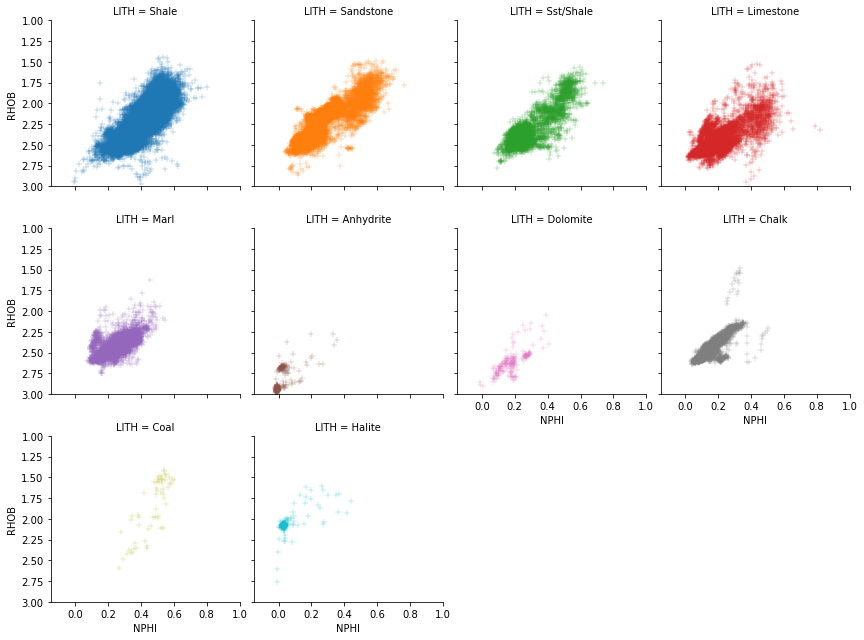

In [15]:
#giving lithlogy classification by data

lith_num = {30000 : "Sandstone",
           65030: "Sst/Shale",
           65000: "Shale", 
           80000: "Marl",
           74000: "Dolomite",
           70000: "Limestone",
           70032: "Chalk", 
           88000: "Halite",
           86000: "Anhydrite",
           95000: "Tuff",
           90000: "Coal",
           93000: "Basement"
           }
#mapping all data with lithology 
data["LITH"] = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].map(lith_num)
dnp = sns.FacetGrid(data, col = "LITH", hue = "LITH", col_wrap = 4)
dnp.map(sns.scatterplot, "NPHI", "RHOB", marker = "+", alpha = 0.5)
dnp.set(xlim=(-0.15, 1))
dnp.set(ylim=(3, 1))

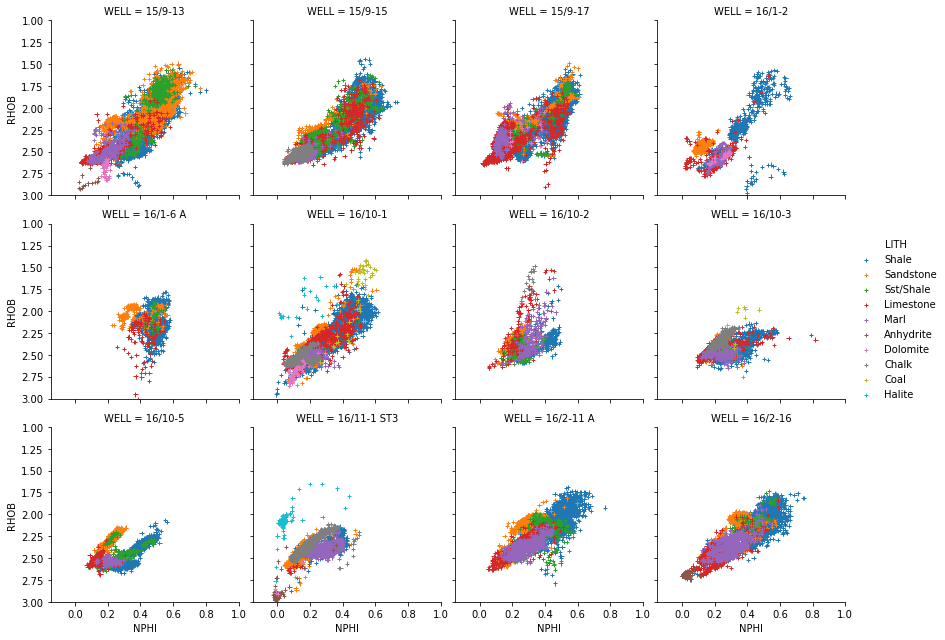

In [16]:
#making subplots groupby wells
g = sns.FacetGrid(data, col = "WELL", hue = "LITH", col_wrap = 4)
g.map(sns.scatterplot, "NPHI", "RHOB", linewidth = 1, size = 0.1, marker = "+")
g.set(xlim = (-0.15, 1))
g.set(ylim = (3, 1))
g.add_legend()

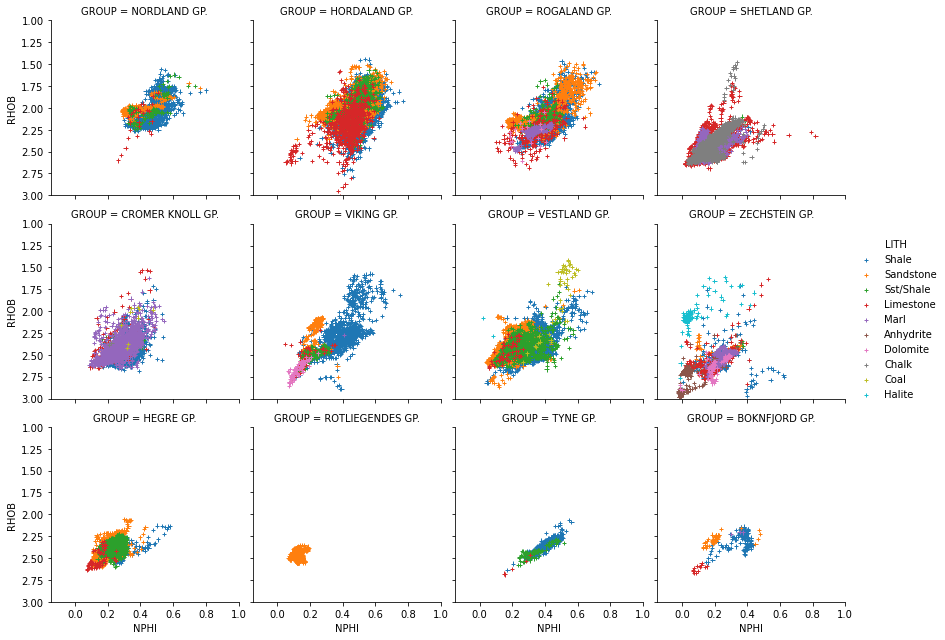

In [17]:
#making subplots groupby groups(given in data)
g = sns.FacetGrid(data, col = "GROUP", hue = "LITH", col_wrap = 4)
g.map(sns.scatterplot, "NPHI", "RHOB", linewidth = 1, size = 0.1, marker = "+")
g.set(xlim = (-0.15, 1))
g.set(ylim = (3, 1))
g.add_legend()

## Seaborn Pairplot (identifying relaionships)

In [18]:
#taking logs for plotting pairplot for relationships
keylogs = ["CALI", "RHOB", "GR", "NPHI", "BS", "PEF", "DTS", "RDEP", "RMED", "DTC"]
subset = data[keylogs]

In [19]:
#dropping null values
subset.dropna()

,CALI,RHOB,GR,NPHI,BS,PEF,DTS,RDEP,RMED,DTC
90145,9.172491,2.269236,70.982765,0.509389,12.250001,8.824317,158.274597,1.131711,0.899208,81.404381
90146,9.502436,2.420680,65.994087,0.366960,12.250001,7.678865,156.922211,1.135949,0.891061,80.295700
90147,9.692913,2.331994,66.565147,0.289407,12.250001,6.559052,155.774643,1.139201,0.890744,79.370796
90148,9.890905,2.328588,67.719505,0.269194,12.250001,7.105228,155.365829,1.143700,0.893859,79.169151
90149,10.107127,2.321023,66.386986,0.292627,12.250001,7.869129,155.508820,1.099546,0.869008,79.796066
...,...,...,...,...,...,...,...,...,...,...
133101,8.745258,2.539213,127.131035,0.121381,8.500000,3.527269,129.266602,5.770318,6.305647,69.476944
133102,8.715751,2.536888,125.935715,0.119621,8.500000,3.497186,128.262619,5.554542,5.891857,69.412331
133103,8.698041,2.538761,128.006821,0.120676,8.500000,3.546171,129.006378,5.606950,5.871696,69.552185
133104,8.723778,2.540674,130.457199,0.121298,8.500000,3.598472,130.586456,5.505532,5.868315,69.633751


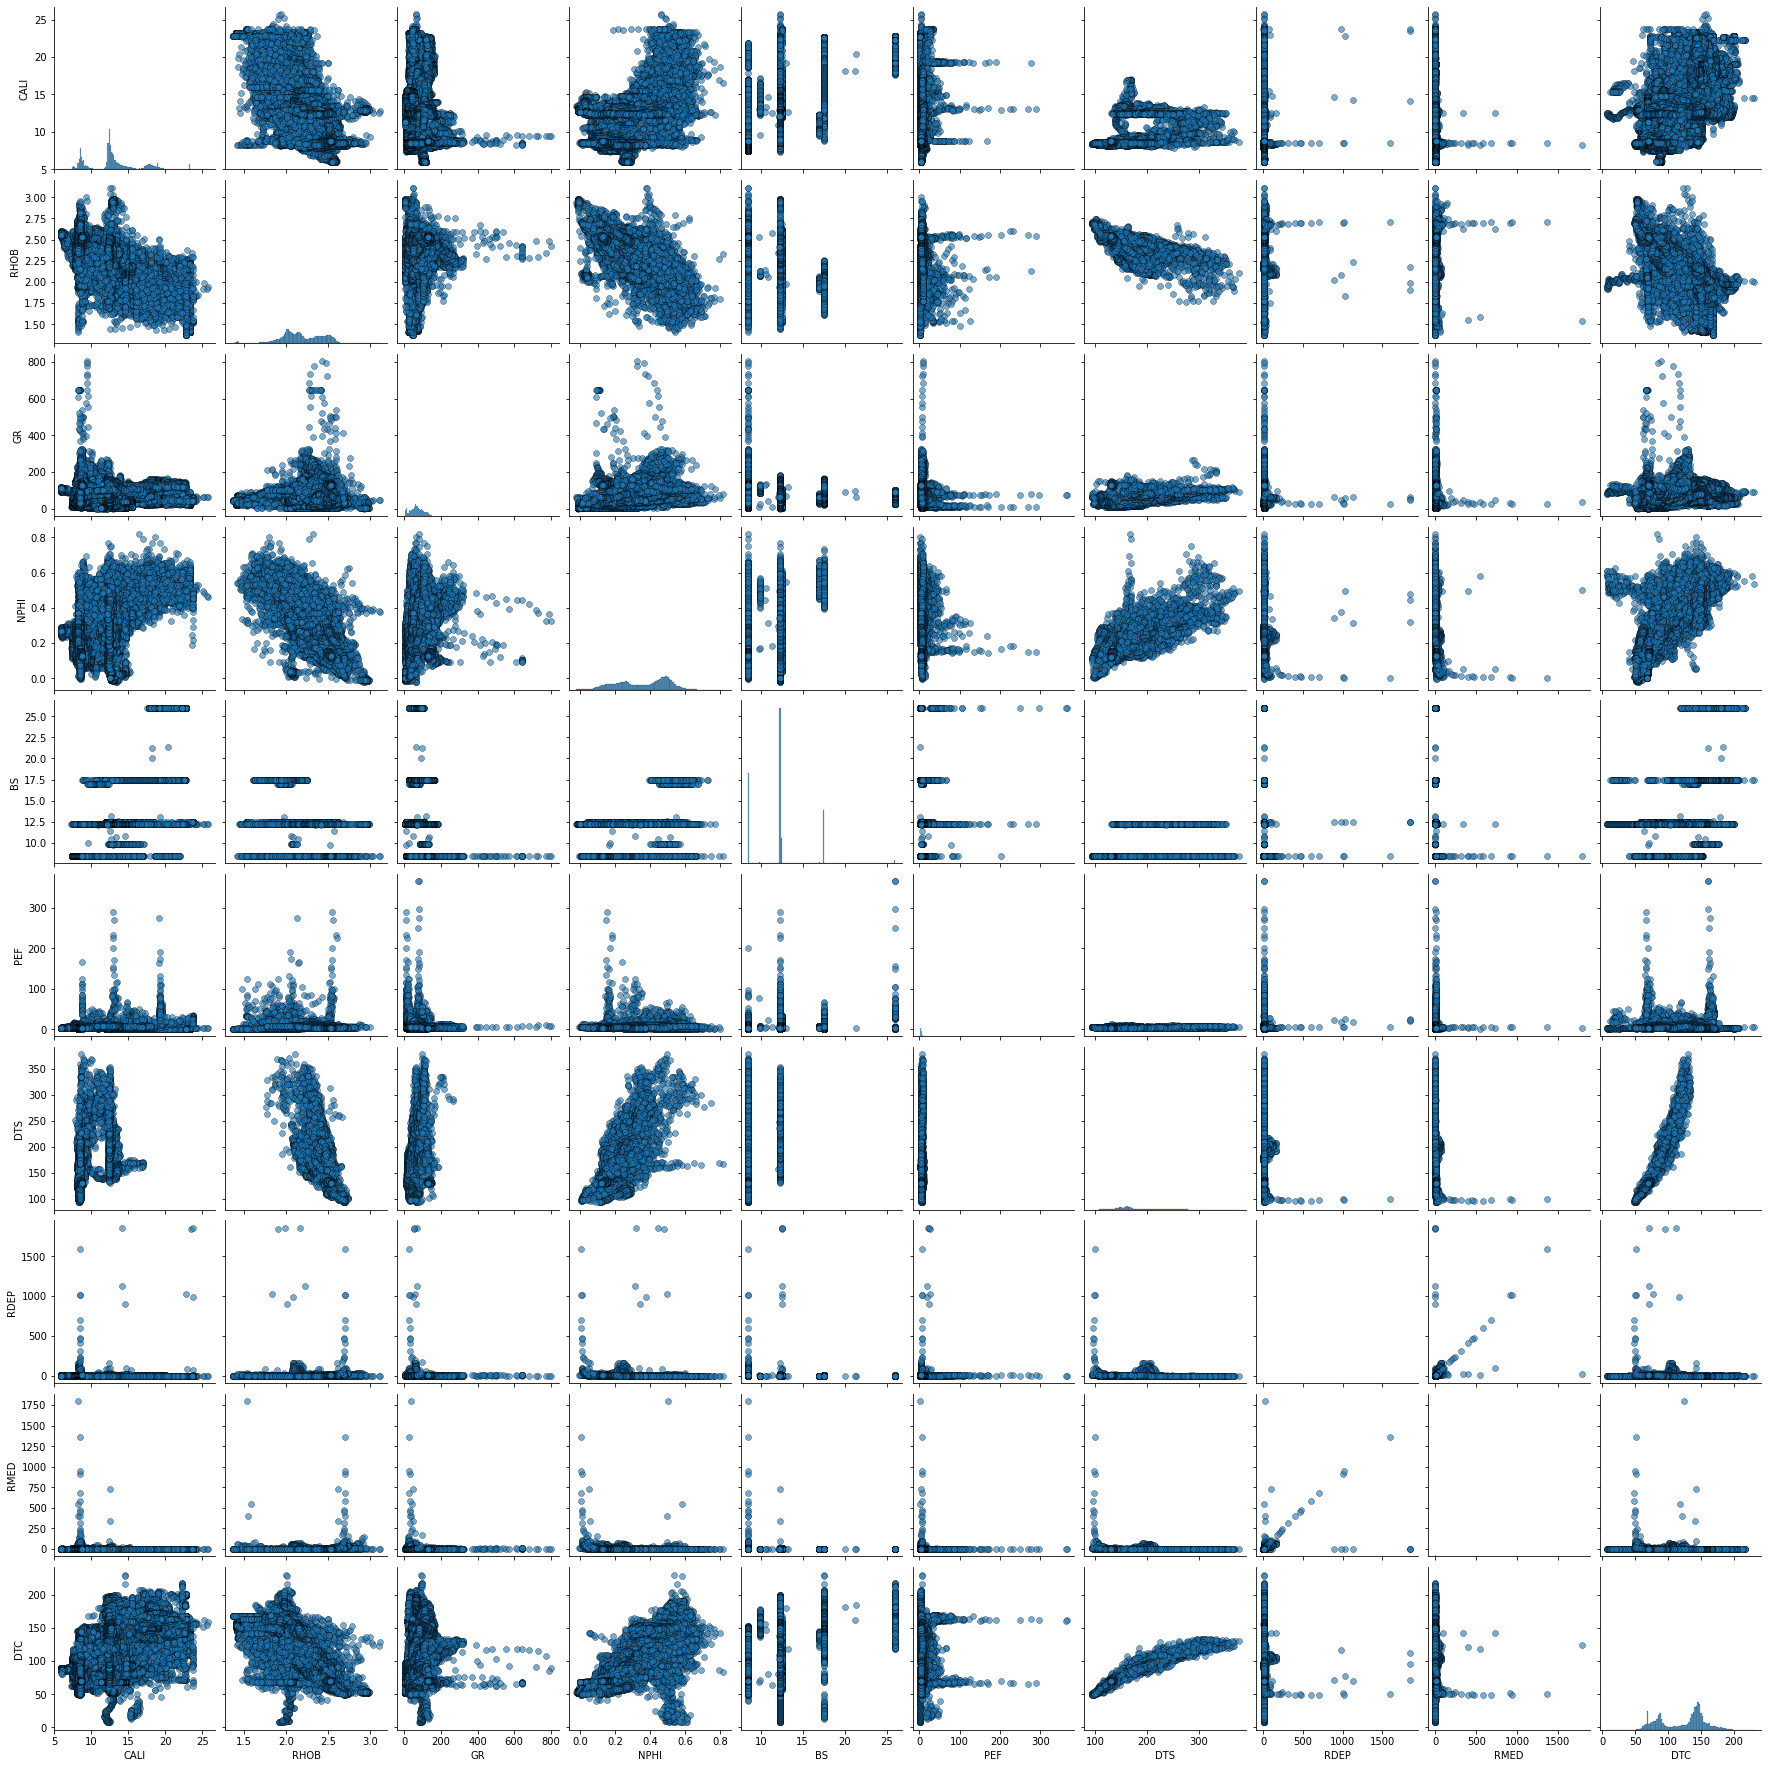

In [20]:
#plotting paiplot
sns.pairplot(subset, vars=keylogs, diag_kind='hist', plot_kws={'alpha':0.6, 'edgecolor':'k'})

## Identifying Bad hole data

In [21]:
#using bitsize curve with caliper curve to create difference caliper
data["DIF_CAL"] = data["CALI"] - data["BS"]
#groupingby data
grouped = data.groupby("WELL")
nrows = int(math.ceil(len(grouped)/3.))


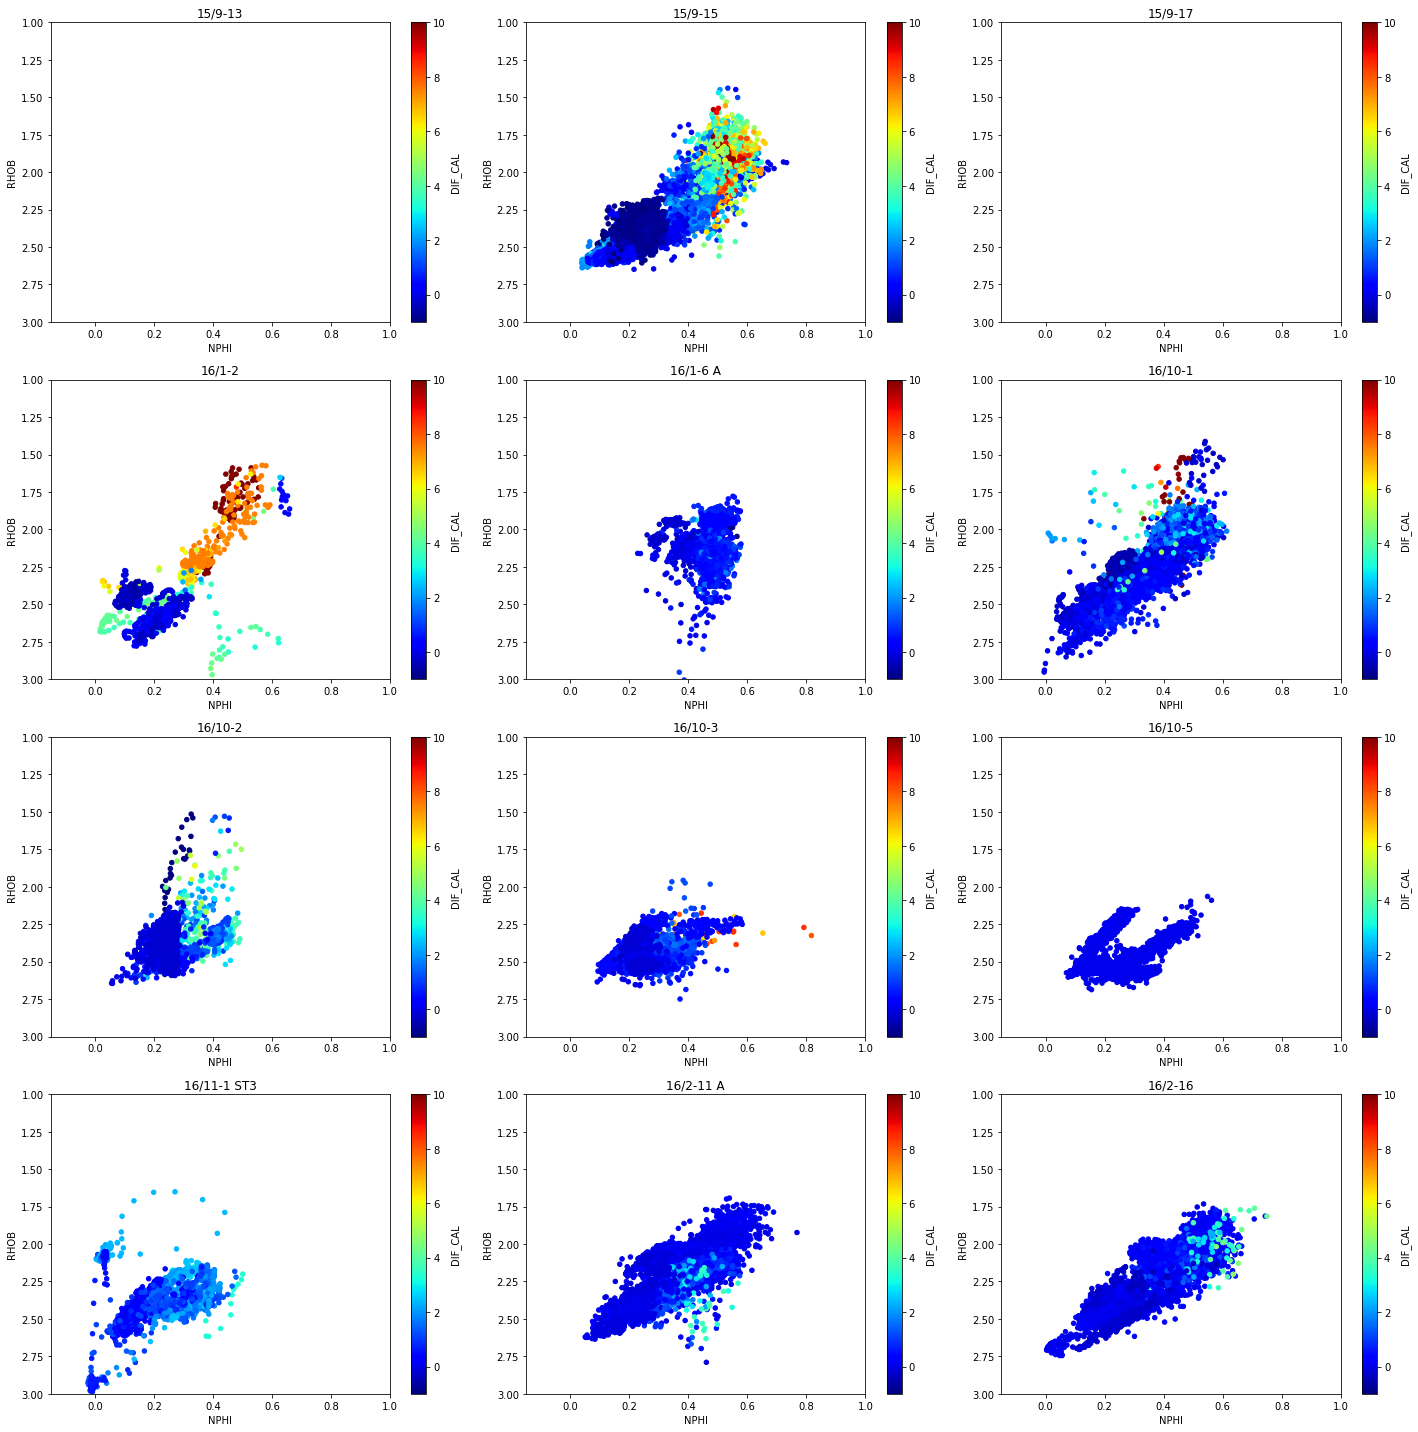

In [22]:
#grouping by well
fig, axs = plt.subplots(nrows, 3, figsize = (20, 20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind = "scatter", x = "NPHI", y = "RHOB", ax=ax, c = "DIF_CAL", cmap="jet", vmin =-1, vmax = 10)
    ax.set_xlim(-0.15, 1)
    ax.set_ylim(3, 1)
    ax.set_title(name)
plt.tight_layout()

In [23]:
group_lith = data.groupby("LITH")

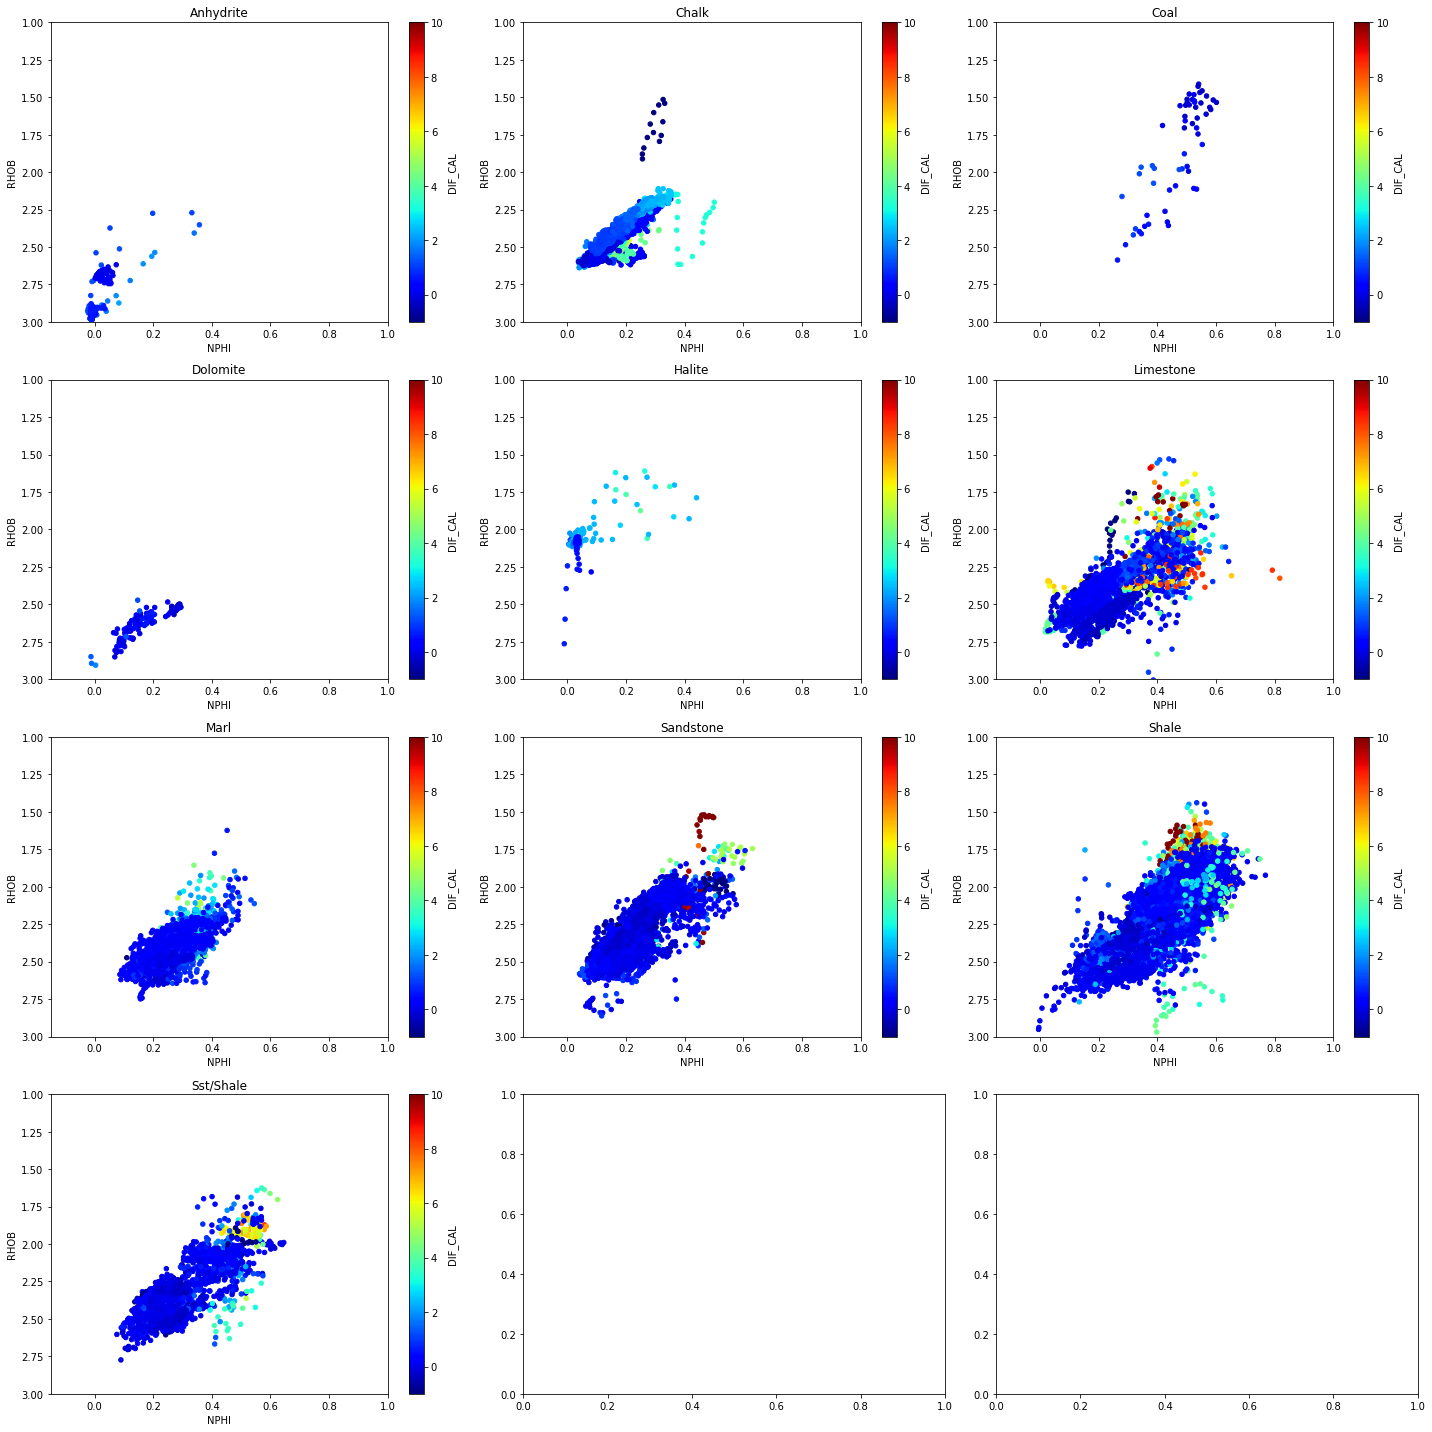

In [24]:
#groupying by lithology
fig, axs = plt.subplots(nrows, 3, figsize = (20, 20))
for (name, df), ax in zip(group_lith, axs.flat):
    df.plot(kind = "scatter", x = "NPHI", y = "RHOB", ax=ax, c = "DIF_CAL", cmap="jet", vmin =-1, vmax = 10)
    ax.set_xlim(-0.15, 1)
    ax.set_ylim(3, 1)
    ax.set_title(name)
plt.tight_layout()

### Major Analysis
- Visualing missing data
- Visualizing null values groupying by wells
- Density-neutron log relation wrt groupying wells and different layers and time period of rock
- pairplot relationship between different well logs
- identifying bad hole data (by calliper and bit size log) wrt wells  & lithologies